In [1]:
# https://www.investopedia.com/articles/technical/081501.asp

![title](img/lab43.png)

In [15]:
from tvDatafeed import TvDatafeed, Interval 
import matplotlib.pyplot as plt
tv = TvDatafeed()

In [5]:
df = tv.get_hist(symbol='AAPL',exchange='NASDAQ',interval=Interval.in_daily,n_bars=1000)
df

symbol      open      high       low     close  \
datetime                                                                   
2019-05-29 20:30:00  NASDAQ:AAPL   44.1050   44.8375   44.0000   44.3450   
2019-05-30 20:30:00  NASDAQ:AAPL   44.4875   44.8075   44.1675   44.5750   
2019-05-31 20:30:00  NASDAQ:AAPL   44.0575   44.4975   43.7475   43.7675   
2019-06-03 20:30:00  NASDAQ:AAPL   43.9000   44.4800   42.5675   43.3250   
2019-06-04 20:30:00  NASDAQ:AAPL   43.8600   44.9575   43.6300   44.9100   
...                          ...       ...       ...       ...       ...   
2023-05-10 20:30:00  NASDAQ:AAPL  173.0200  174.0300  171.9000  173.5550   
2023-05-11 20:30:00  NASDAQ:AAPL  173.8500  174.5900  172.1700  173.7500   
2023-05-12 20:30:00  NASDAQ:AAPL  173.6200  174.0600  171.0000  172.5700   
2023-05-15 20:30:00  NASDAQ:AAPL  173.1600  173.2100  171.4700  172.0700   
2023-05-16 20:30:00  NASDAQ:AAPL  171.9900  173.1383  171.8800  172.0900   

                          volume  
datetime                          
2019-05-29 20:30:00  113924660.0  
2019-05-30 20:30:00   84873648.0  
2019-05-31 20:30:00  108174336.0  
2019-06-03 20:30:00  161584276.0  
2019-06-04 20:30:00  123871844.0  
...                          ...  
2023-05-10 20:30:00   53724501.0  
2023-05-11 20:30:00   49514676.0  
2023-05-12 20:30:00   45533138.0  
2023-05-15 20:30:00   37266659.0  
2023-05-16 20:30:00   15317617.0  

[1000 rows x 6 columns]

In [34]:
df2 = df[['close']].copy()
df2['high'] = df2[['close']].rolling(window=100).max()

In [35]:
df2.head(5)

close  high
datetime                          
2019-05-29 20:30:00  44.3450   NaN
2019-05-30 20:30:00  44.5750   NaN
2019-05-31 20:30:00  43.7675   NaN
2019-06-03 20:30:00  43.3250   NaN
2019-06-04 20:30:00  44.9100   NaN

In [43]:
df2['close10DayAgo'] = df2['close'].shift(10)
df2['momentum'] = df2['close']-df2['close10DayAgo']

In [44]:
df2.head(12)

close  high  close10DayAgo  momentum
datetime                                                   
2019-05-29 20:30:00  44.3450   NaN            NaN       NaN
2019-05-30 20:30:00  44.5750   NaN            NaN       NaN
2019-05-31 20:30:00  43.7675   NaN            NaN       NaN
2019-06-03 20:30:00  43.3250   NaN            NaN       NaN
2019-06-04 20:30:00  44.9100   NaN            NaN       NaN
2019-06-05 20:30:00  45.6350   NaN            NaN       NaN
2019-06-06 20:30:00  46.3050   NaN            NaN       NaN
2019-06-07 20:30:00  47.5375   NaN            NaN       NaN
2019-06-10 20:30:00  48.1450   NaN            NaN       NaN
2019-06-11 20:30:00  48.7025   NaN            NaN       NaN
2019-06-12 20:30:00  48.5475   NaN         44.345    4.2025
2019-06-13 20:30:00  48.5375   NaN         44.575    3.9625

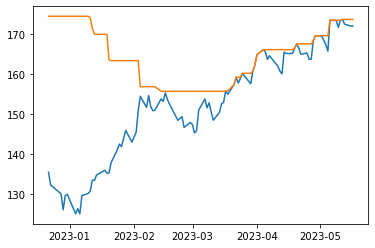

In [50]:
df2 = df2.tail(100)
plt.subplots(facecolor='w')
plt.plot(df2.index,df2.close)
plt.plot(df2.index,df2.high)

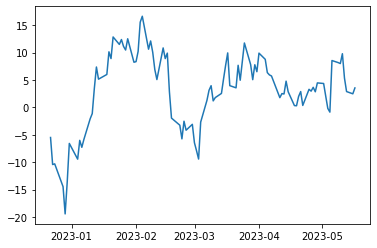

In [51]:
plt.subplots(facecolor='w')
plt.plot(df2.index,df2.momentum)